In [3]:
# Cell 1: Setup
from data_loader import *
import matplotlib.pyplot as plt
from scipy.stats import linregress


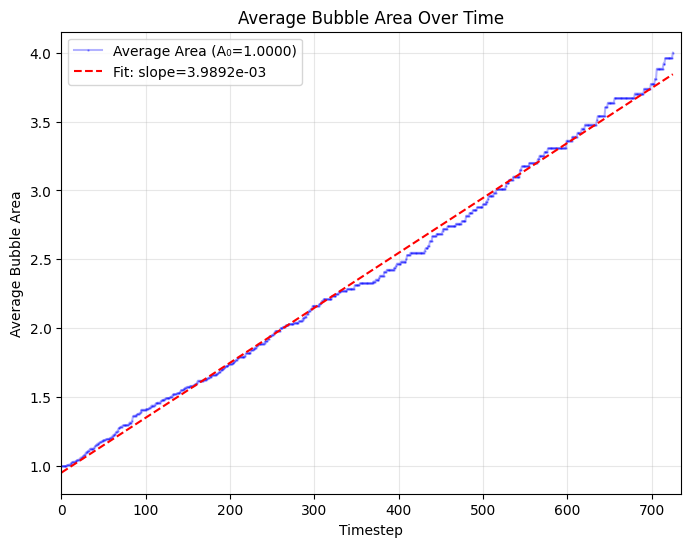

Slope: 3.989192e-03
Initial area A_0: 1.000000


In [4]:

# Cell 2: Average Area with Linear Fit
slope, intercept, r_value, p_value, std_err = linregress(
    avg_area_per_timestep.index, avg_area_per_timestep.values
)

plt.figure(figsize=(8, 6))
plt.plot(avg_area_per_timestep.index, avg_area_per_timestep.values,
         marker='o', markersize=0.75, linestyle='-', alpha=0.3,
         color='blue', label=f'Average Area (A₀={A_0:.4f})')
plt.plot(avg_area_per_timestep.index, intercept + slope * avg_area_per_timestep.index,
         'r--', label=f'Fit: slope={slope:.4e}')
plt.xlabel("Timestep")
plt.ylabel("Average Bubble Area")
plt.title("Average Bubble Area Over Time")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, max_timestep + 10)
# plt.savefig("Figures/average_area.png", dpi=300)
plt.show()

print(f"Slope: {slope:.6e}")
print(f"Initial area A_0: {A_0:.6f}")


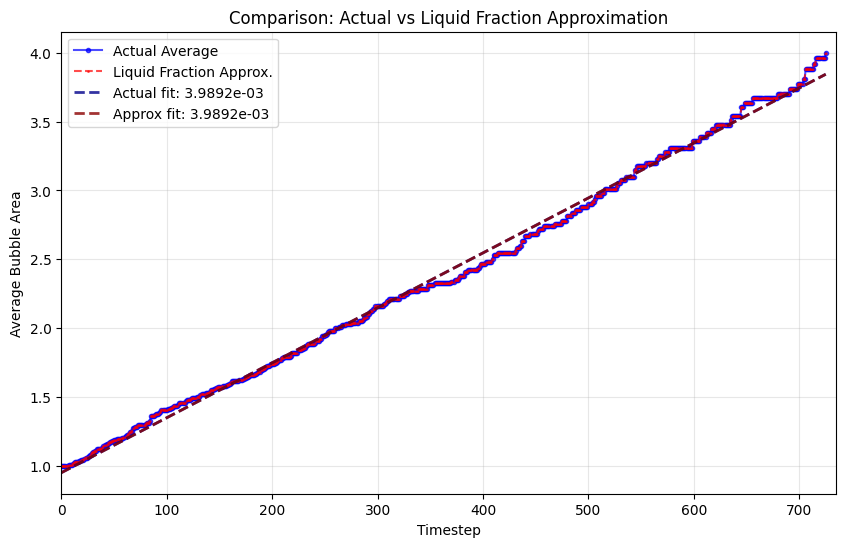

Slope comparison:
Actual average area slope: 3.989192e-03
Approximated area slope: 3.989192e-03
Slope ratio (Actual/Approx): 1.000


In [ ]:
liquid_fraction = 0.02
box_area = 20.203051 ** 2 


# Cell 3: Comparison with Liquid Fraction Approximation
slope_actual, intercept_actual, _, _, _ = linregress(
    avg_area_per_timestep.index, avg_area_per_timestep.values
)
slope_approx, intercept_approx, _, _, _ = linregress(
    approx_avg_area.index, approx_avg_area.values
)

plt.figure(figsize=(10, 6))

plt.plot(avg_area_per_timestep.index, avg_area_per_timestep.values,
         'o-', markersize=3, alpha=0.7, color='blue', label='Actual Average')
plt.plot(approx_avg_area.index, approx_avg_area.values,
         '^--', markersize=1, alpha=0.7, color='red', label='Liquid Fraction Approx.')

plt.plot(avg_area_per_timestep.index, intercept_actual + slope_actual * avg_area_per_timestep.index,
         '--', alpha=0.8, color='darkblue', linewidth=2,
         label=f'Actual fit: {slope_actual:.4e}')
plt.plot(approx_avg_area.index, intercept_approx + slope_approx * approx_avg_area.index,
         '--', alpha=0.8, color='darkred', linewidth=2,
         label=f'Approx fit: {slope_approx:.4e}')

plt.xlabel("Timestep")
plt.ylabel("Average Bubble Area")
plt.title("Comparison: Actual vs Liquid Fraction Approximation")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, max_timestep + 10)
# plt.savefig("Figures/area_comparison.png", dpi=300)
plt.show()

print(f"Slope comparison:")
print(f"Actual average area slope: {slope_actual:.6e}")
print(f"Approximated area slope: {slope_approx:.6e}")
print(f"Slope ratio (Actual/Approx): {slope_actual/slope_approx:.3f}")



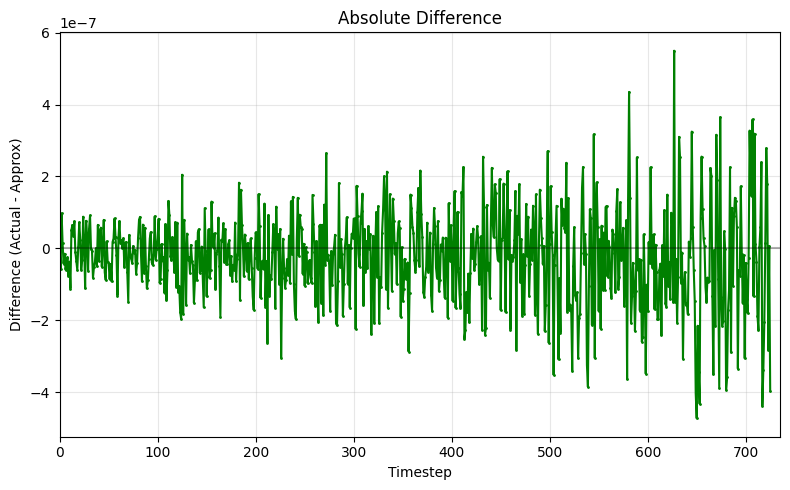

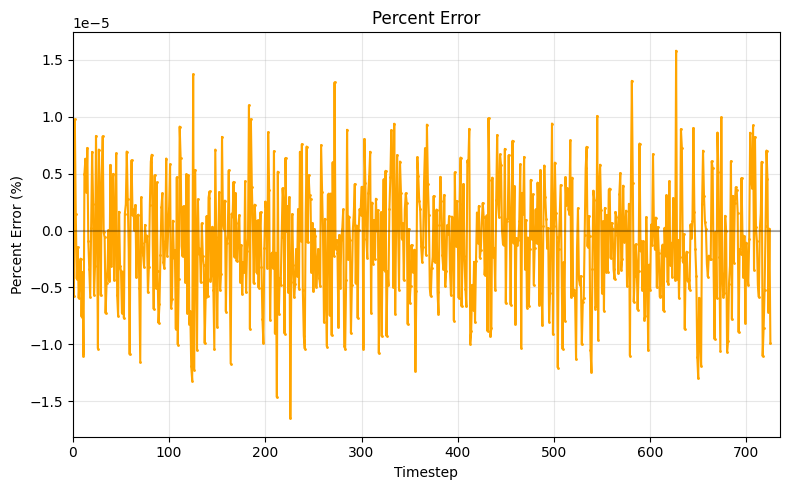

Mean percent error: -0.00%
Std percent error: 0.00%


In [7]:
# Cell 4: Error Analysis
difference = avg_area_per_timestep - approx_avg_area
percent_error = (difference / avg_area_per_timestep) * 100

# Absolute difference
plt.figure(figsize=(8, 5))
plt.plot(difference.index, difference.values, marker='o', markersize=1, color='green')
plt.xlabel("Timestep")
plt.ylabel("Difference (Actual - Approx)")
plt.title("Absolute Difference")
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.xlim(0, avg_area_per_timestep.index.max()+10)
plt.savefig("/Users/conorkirby/projects/python/Capstone/Figures/absolute_difference_bubble_area_methods.png", dpi=300)
plt.show()

# Percent error
plt.figure(figsize=(8, 5))
plt.plot(percent_error.index, percent_error.values, marker='o', markersize=1, color='orange')
plt.xlabel("Timestep")
plt.ylabel("Percent Error (%)")
plt.title("Percent Error")
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.xlim(0, avg_area_per_timestep.index.max()+10)
plt.savefig("/Users/conorkirby/projects/python/Capstone/Figures/percent_error_bubble_area_methods.png", dpi=300)
plt.show()

print(f"Mean percent error: {percent_error.mean():.2f}%")
print(f"Std percent error: {percent_error.std():.2f}%")